In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.utils import image_dataset_from_directory
import os

In [2]:
# Data storage
DATA_FOLDER = "./"
TRAIN_FOLDER_NAME = "Train"
PROVIDED_TEST_FOLDER_NAME = "Test"
CUSTOM_TEST_FOLDER_NAME = "CustomTest"
DEVANAGARI_DATA_FOLDER = os.path.join(DATA_FOLDER, "DevanagariHandwrittenDigitDataset")

RANDOM_SEED = 21

# Data parameters
BATCH_SIZE = 32
IMG_HEIGHT = 32
IMG_WIDTH = 32

# Training parameters
epochs = 15


In [3]:
nums_to_labels = {0: 'digit_0', 1: 'digit_1', 2: 'digit_2', 3: 'digit_3', 4: 'digit_4', 5: 'digit_5', 6: 'digit_6', 7: 'digit_7', 8: 'digit_8', 9: 'digit_9'}
label_names = ['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

In [4]:
train_dataset = image_dataset_from_directory(
    os.path.join(DEVANAGARI_DATA_FOLDER, TRAIN_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=label_names,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None, # None, so that we get all the data.
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17000 files belonging to 10 classes.


In [5]:
# Provided test dataset
test_dataset = image_dataset_from_directory(
    os.path.join(DEVANAGARI_DATA_FOLDER, PROVIDED_TEST_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=label_names,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None,  # None, so that we get all the data.
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3000 files belonging to 10 classes.


In [6]:
# Provided test dataset

custom_test_dataset = image_dataset_from_directory(
    os.path.join(DEVANAGARI_DATA_FOLDER, CUSTOM_TEST_FOLDER_NAME),
    labels="inferred",
    label_mode="int",
    class_names=label_names,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    seed=RANDOM_SEED,
    validation_split=None,  # None, so that we get all the data.
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 100 files belonging to 10 classes.


(32, 32, 1)


2022-11-02 01:38:32.271073: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


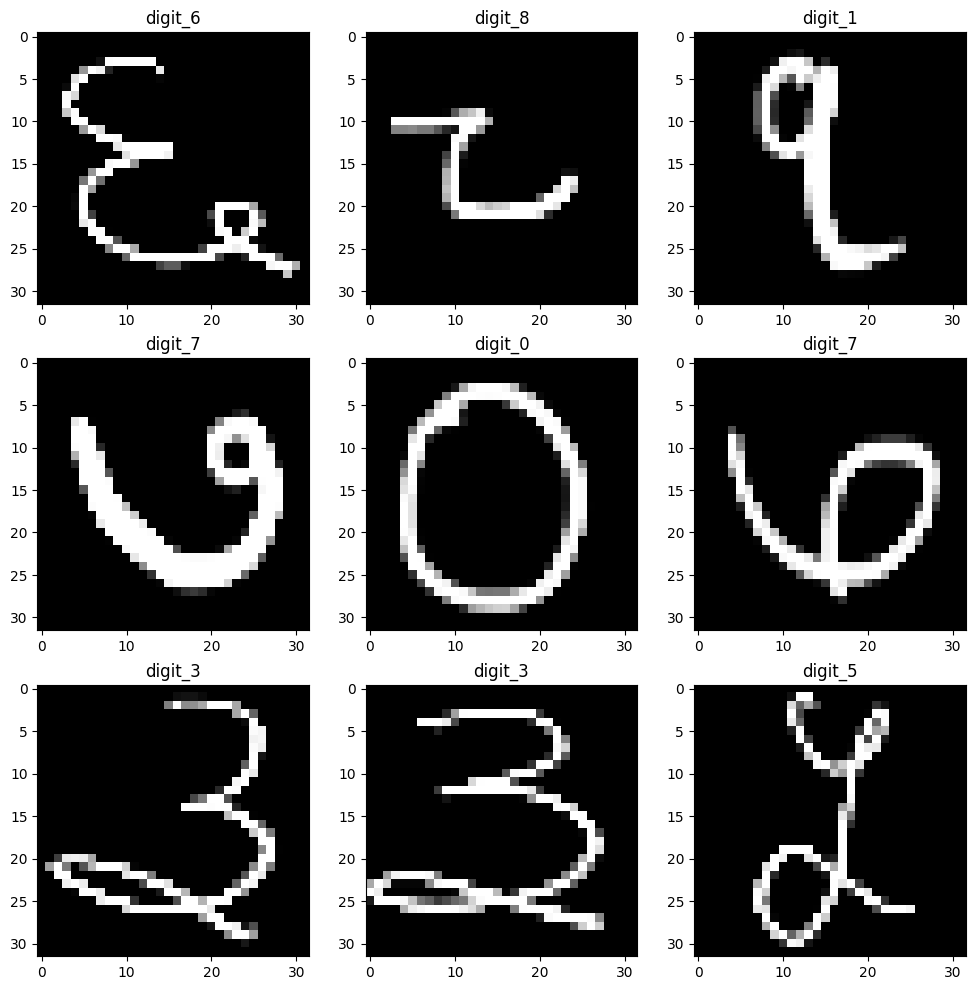

In [7]:
# Take a look at the input data
rows = 3
columns = 3
fig = plt.figure(figsize=(12, 12))
i = 1
for images, labels in train_dataset.take(1):
    print(images[0].shape)
    for image, label in zip(images[:9], labels[:9]):
        fig.add_subplot(rows, columns, i)
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.title(nums_to_labels[int(label)])
        i += 1

In [18]:
model = models.Sequential(
    [
       
        layers.Conv2D(BATCH_SIZE, 3, activation="relu", input_shape=(BATCH_SIZE, BATCH_SIZE, 1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(BATCH_SIZE*2, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(BATCH_SIZE*2, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(BATCH_SIZE*2, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)


Epoch 1/15
532/532 [==============================] - 5s 9ms/step - loss: 0.3960 - accuracy: 0.9142 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 2/15
532/532 [==============================] - 5s 9ms/step - loss: 0.0536 - accuracy: 0.9827 - val_loss: 0.0366 - val_accuracy: 0.9887
Epoch 3/15
532/532 [==============================] - 5s 10ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 4/15
532/532 [==============================] - 5s 9ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 5/15
532/532 [==============================] - 5s 9ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0437 - val_accuracy: 0.9897
Epoch 6/15
532/532 [==============================] - 5s 9ms/step - loss: 0.0201 - accuracy: 0.9940 - val_loss: 0.0366 - val_accuracy: 0.9907
Epoch 7/15
532/532 [==============================] - 5s 9ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.1110 - val_accuracy: 0.9790
Epoch

In [19]:
model.save("hindi_digit_recognizer.model")

INFO:tensorflow:Assets written to: hindi_digit_recognizer.model/assets


INFO:tensorflow:Assets written to: hindi_digit_recognizer.model/assets


In [17]:
del model

In [11]:
model = models.load_model("./hindi_digit_recognizer.model")

In [20]:
loss, accuracy = model.evaluate(train_dataset)
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss}\nAccuracy: {accuracy}")
print(f"Test loss: {test_loss}\nTest accuracy: {test_accuracy}")

94/94 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9863
Loss: 0.027521567419171333
Accuracy: 0.9939411878585815
Test loss: 0.0896807461977005
Test accuracy: 0.9863333106040955


In [21]:
custom_test_loss, custom_test_accuracy = model.evaluate(custom_test_dataset)
print(f"Custom test loss: {custom_test_loss}\nCustom test accuracy: {custom_test_accuracy}")

4/4 [==============================] - 0s 4ms/step - loss: 4.6634 - accuracy: 0.7600
Custom test loss: 4.6633710861206055
Custom test accuracy: 0.7599999904632568
